In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('train.csv')
df1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df2=pd.read_csv('test.csv')
df2.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [2]:
import numpy as np

In [6]:
var_cols=[]
var_0_cols=[]
feature_0_var=[]
import statistics
for feature in df1.columns:
    if df1[feature].dtypes!='object':
        var=statistics.variance(df1[feature])
        var_cols.append(var)
        if var==0:
            var_0_cols.append(var)
            feature_0_var.append(feature)

In [7]:
df1.drop(columns=['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'],inplace=True)
df2.drop(columns=['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'],inplace=True)

In [10]:
var_cols=[]
var_0_cols=[]
feature_0_var=[]
import statistics
for feature in df2.columns:
    if df2[feature].dtypes!='object':
        var=statistics.variance(df2[feature])
        var_cols.append(var)
        if var==0:
            var_0_cols.append(var)
            feature_0_var.append(feature)

In [11]:
df2.drop(columns=['X257', 'X258', 'X295', 'X296', 'X369'],inplace=True)
df1.drop(columns=['X257', 'X258', 'X295', 'X296', 'X369'],inplace=True)

All the columns with 0 variance is removed in trained and test dataset

In [14]:
df1.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 361, dtype: int64

In [15]:
df2.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 360, dtype: int64

In [16]:
for feature in df1.columns:
    if df1[feature].dtypes!='object':
        if df1[feature].isnull().sum()!=0:
            print(feature)

In [17]:
for feature in df2.columns:
    if df2[feature].dtypes!='object':
        if df2[feature].isnull().sum()!=0:
            print(feature)

There is no null values in Training and Testing set

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
length=len(df1)

In [20]:
columns=['X0','X1','X2','X3','X4','X5','X6','X8']

In [21]:
for column in columns:
    lst=list()
    lst.extend(df1[column].tolist())
    lst.extend(df2[column].tolist())
    le=LabelEncoder()
    lst=le.fit_transform(lst)
    df1[column]=lst[:length]
    df2[column]=lst[length:]

The Label Encoding is Successfully performed in Training and Testing set

In [3]:
from sklearn.decomposition import PCA

In [25]:
X_train=df1.drop(columns=['ID','y'])
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,37,21,22,4,3,31,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,24,24,38,2,3,30,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,24,21,38,5,3,30,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,23,38,5,3,14,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,10,20,19,2,3,1,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,36,16,44,3,3,1,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,10,23,42,0,3,1,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,11,19,29,5,3,1,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y_train=df1['y']
y_train

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [27]:
X_test=df2.drop(columns=['ID'])
X_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,9,9,19,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,46,1,9,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,51,23,19,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,10,23,19,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
pca=PCA(random_state=42)
pca.fit(X_train)
explained_variance=pca.explained_variance_ratio_
cumsum_explained_variance=np.cumsum(explained_variance)

In [29]:
X_train_transform=pca.transform(X_train)
X_train_transform

array([[ 2.07635555e-01,  2.44469637e-02,  1.48645068e+01, ...,
        -3.89016597e-12, -5.70654635e-14, -3.49165141e-14],
       [ 2.44087323e-01,  1.73167826e+00,  1.82110792e+01, ...,
        -8.86984930e-12,  6.77236045e-14,  5.44009282e-14],
       [-1.62731506e+01,  1.37845332e+01,  1.79269882e+01, ...,
        -1.78454473e-11, -6.66133815e-16,  3.70814490e-14],
       ...,
       [-3.10773909e+01,  1.60215144e+01, -1.14346013e+01, ...,
         7.88258347e-15, -2.22044605e-16,  1.93178806e-14],
       [-2.56465561e+01,  2.81245521e+00, -1.22524198e+01, ...,
         3.82138765e-13,  1.15463195e-14,  2.77555756e-15],
       [ 1.88429803e+01, -1.09969222e+01, -1.01931377e+01, ...,
         5.82867088e-13,  5.99520433e-15, -1.12132525e-14]],
      shape=(4209, 359))

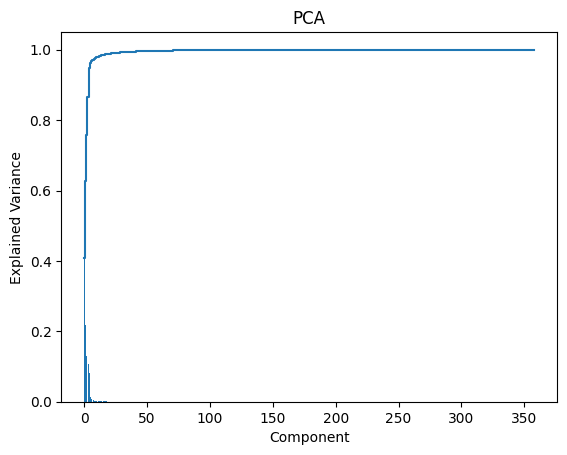

In [30]:
import matplotlib.pyplot as plt
plt.bar(range(0,len(explained_variance)),explained_variance,align='center')
plt.step(range(0,len(cumsum_explained_variance)),cumsum_explained_variance,where='mid')
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.title('PCA')
plt.show()

In [31]:
print(explained_variance)

[4.08692297e-01 2.17586316e-01 1.31201584e-01 1.07835840e-01
 8.16529619e-02 1.40934843e-02 6.60954368e-03 3.84661280e-03
 2.60290189e-03 2.14375343e-03 2.09857534e-03 1.80388107e-03
 1.48013597e-03 1.31163845e-03 1.14049091e-03 9.18547902e-04
 8.49323795e-04 7.95522135e-04 6.96366608e-04 6.28354461e-04
 5.72250617e-04 5.53034498e-04 5.18555095e-04 4.54853092e-04
 4.30271009e-04 3.83965591e-04 3.66661759e-04 3.34656595e-04
 3.27457566e-04 3.15392131e-04 2.93049356e-04 2.78590517e-04
 2.65173113e-04 2.51323822e-04 2.37483402e-04 2.20144638e-04
 1.96197661e-04 1.90366862e-04 1.83366459e-04 1.73942349e-04
 1.65769244e-04 1.58455439e-04 1.55717225e-04 1.54478357e-04
 1.51337639e-04 1.35756855e-04 1.32424502e-04 1.27355197e-04
 1.25375581e-04 1.22366236e-04 1.17773694e-04 1.14936389e-04
 1.11556467e-04 1.05704820e-04 1.01656267e-04 9.57642703e-05
 9.48464906e-05 9.11956981e-05 8.97370417e-05 8.74322222e-05
 8.24669752e-05 8.03716874e-05 7.69856218e-05 7.61977108e-05
 7.04237188e-05 6.897829

In [32]:
print(cumsum_explained_variance)

[0.4086923  0.62627861 0.7574802  0.86531604 0.946969   0.96106248
 0.96767203 0.97151864 0.97412154 0.9762653  0.97836387 0.98016775
 0.98164789 0.98295953 0.98410002 0.98501857 0.98586789 0.98666341
 0.98735978 0.98798813 0.98856038 0.98911342 0.98963197 0.99008683
 0.9905171  0.99090106 0.99126772 0.99160238 0.99192984 0.99224523
 0.99253828 0.99281687 0.99308204 0.99333337 0.99357085 0.99379099
 0.99398719 0.99417756 0.99436093 0.99453487 0.99470064 0.99485909
 0.99501481 0.99516929 0.99532063 0.99545638 0.99558881 0.99571616
 0.99584154 0.9959639  0.99608168 0.99619661 0.99630817 0.99641388
 0.99651553 0.9966113  0.99670614 0.99679734 0.99688708 0.99697451
 0.99705697 0.99713735 0.99721433 0.99729053 0.99736095 0.99742993
 0.9974973  0.99756357 0.99762624 0.9976873  0.99774657 0.99780514
 0.99786156 0.99791623 0.99797017 0.99802277 0.99807472 0.99812473
 0.99817344 0.9982216  0.99826882 0.9983146  0.99835921 0.99840226
 0.99844384 0.99848496 0.99852472 0.99856359 0.99860184 0.9986

In [33]:
pca=PCA(n_components=6,random_state=42)
pca.fit(X_train)

PCA(n_components=6, random_state=42)

In [34]:
X_train_comp_transform=pca.transform(X_train)
X_train_comp_transform

array([[ 2.07635555e-01,  2.44469637e-02,  1.48645068e+01,
         8.13169859e+00,  1.41492091e+00,  2.69553553e+00],
       [ 2.44087323e-01,  1.73167826e+00,  1.82110792e+01,
         5.24020418e+00,  1.58050574e+00,  4.44292251e+00],
       [-1.62731506e+01,  1.37845332e+01,  1.79269882e+01,
         5.59819528e+00,  1.17681847e+01,  2.17044647e+00],
       ...,
       [-3.10773909e+01,  1.60215144e+01, -1.14346013e+01,
         8.79780735e+00, -6.05370935e+00, -7.59649287e-01],
       [-2.56465561e+01,  2.81245521e+00, -1.22524198e+01,
         6.83081129e+00,  9.40804124e+00,  4.35568981e+00],
       [ 1.88429803e+01, -1.09969222e+01, -1.01931377e+01,
         1.62230343e+01,  8.55272127e+00, -5.15986681e-01]],
      shape=(4209, 6))

In [35]:
X_train_comp_transform=pd.DataFrame(X_train_comp_transform)
X_train_comp_transform

,0,1,2,3,4,5
0,0.207636,0.024447,14.864507,8.131699,1.414921,2.695536
1,0.244087,1.731678,18.211079,5.240204,1.580506,4.442923
2,-16.273151,13.784533,17.926988,5.598195,11.768185,2.170446
3,-16.224685,14.794591,16.449820,1.644787,-6.948369,4.299126
4,-16.552597,14.557946,2.099070,8.883857,2.012850,-3.752400
...,...,...,...,...,...,...
4204,-24.800129,-7.077351,-12.180647,8.031097,4.671287,-3.520822
4205,-5.224044,23.998165,-11.873095,7.463138,-3.326305,-0.048791
4206,-31.077391,16.021514,-11.434601,8.797807,-6.053709,-0.759649
4207,-25.646556,2.812455,-12.252420,6.830811,9.408041,4.355690


In [36]:
X_test_comp_transform=pca.transform(X_test)
X_test_comp_transform

array([[-16.18289383,  13.73001926,  13.92066028,   6.0812825 ,
         10.74846712,  -6.77561876],
       [ 15.79832627,  -8.61091985,  -7.33675546,  -2.53004383,
         11.91055837,  -0.93630644],
       [-12.38273424,  -3.22768301, -11.81372861,  13.3513868 ,
         -2.80484229,   2.57898609],
       ...,
       [ 13.6935818 ,   2.2080687 ,  -8.83151307,  19.3065749 ,
          9.14438064,  -3.5873095 ],
       [-25.43442274,  -7.03546185, -11.37025443,  10.70249052,
          4.47744822,  -4.3545796 ],
       [ 15.89064179,  -8.12461872, -15.7091967 ,  -2.23254374,
          5.16889428,  -1.14249279]], shape=(4209, 6))

In [37]:
X_test_comp_transform=pd.DataFrame(X_test_comp_transform)
X_test_comp_transform

,0,1,2,3,4,5
0,-16.182894,13.730019,13.920660,6.081282,10.748467,-6.775619
1,15.798326,-8.610920,-7.336755,-2.530044,11.910558,-0.936306
2,-12.382734,-3.227683,-11.813729,13.351387,-2.804842,2.578986
3,-14.239591,14.314452,16.412392,-5.776836,2.482752,3.925170
4,12.342383,1.651356,18.523485,6.763804,-0.952236,1.440040
...,...,...,...,...,...,...
4204,-23.848035,-6.605670,-15.799816,-3.187884,-6.464038,2.192149
4205,16.096907,-8.414222,-15.516467,-1.845722,12.157773,1.707808
4206,13.693582,2.208069,-8.831513,19.306575,9.144381,-3.587309
4207,-25.434423,-7.035462,-11.370254,10.702491,4.477448,-4.354580


The Dimensionality reduction is been performed on training and testing data

In [38]:
from xgboost import XGBRegressor

In [40]:
from sklearn.model_selection import KFold,cross_val_score

In [41]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)

In [42]:
model=XGBRegressor(n_estimators=100,learning_rate=0.01,n_jobs=-1,max_depth=5,random_state=42)

In [43]:
acc=cross_val_score(model,X_train_comp_transform,y_train,cv=kfold,scoring='neg_mean_absolute_percentage_error',n_jobs=-1)

In [44]:
print(acc)

[-0.07787581 -0.08407408 -0.07949267 -0.08019688 -0.08365113 -0.07501012
 -0.08104549 -0.07525631 -0.07965499 -0.08078935]


In [45]:
print(acc.mean())

-0.07970468195086691


In [46]:
model.fit(X_train_comp_transform,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [47]:
y_predicted=model.predict(X_test_comp_transform)

In [48]:
y_predicted

array([ 86.4902  ,  97.171196,  98.7464  , ..., 105.01631 , 105.77415 ,
        97.171196], shape=(4209,), dtype=float32)

The Predicted Value of X_test is been evaluated